In [2]:
import pandas as pd 
import os
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import imageio
from PIL import Image
from shutil import copyfile
import cv2
import datetime as dt
import torch
import pickle

# edit dir_data and dir_attr to where you images and csv file is
dir_data = "../img_align_celeba/img_align_celeba/"
dir_attr = "../list_attr_celeba.csv"


In [3]:
pd2 = pd.read_csv(dir_attr)['image_id']
g = pd2.to_numpy()
rand = npr.randint(0, 202598, 150000)
rand1 = npr.choice(202598, 150000, replace=False)
images = g[rand1]
images.shape

(150000,)

In [4]:
def load_image(path, max_dim=None, gray=False):
    image = cv2.imread(path)
    image = cv2.resize(image, (64,64), interpolation=cv2.INTER_CUBIC)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [5]:
img_array = np.zeros((150000, 64, 64))
for i in range(images.shape[0]):
    path = dir_data + images[i]
    decode = load_image(path, 64, gray=True)
    img_array[i] = decode
    print(i)
print(img_array)

147346
147347
147348
147349
147350
147351
147352
147353
147354
147355
147356
147357
147358
147359
147360
147361
147362
147363
147364
147365
147366
147367
147368
147369
147370
147371
147372
147373
147374
147375
147376
147377
147378
147379
147380
147381
147382
147383
147384
147385
147386
147387
147388
147389
147390
147391
147392
147393
147394
147395
147396
147397
147398
147399
147400
147401
147402
147403
147404
147405
147406
147407
147408
147409
147410
147411
147412
147413
147414
147415
147416
147417
147418
147419
147420
147421
147422
147423
147424
147425
147426
147427
147428
147429
147430
147431
147432
147433
147434
147435
147436
147437
147438
147439
147440
147441
147442
147443
147444
147445
147446
147447
147448
147449
147450
147451
147452
147453
147454
147455
147456
147457
147458
147459
147460
147461
147462
147463
147464
147465
147466
147467
147468
147469
147470
147471
147472
147473
147474
147475
147476
147477
147478
147479
147480
147481
147482
147483
147484
147485
147486
147487
147488

In [6]:
# torch.save(img_array, 'celebA.pt')
img_array

array([[[109., 106., 104., ..., 105., 107., 115.],
        [109., 106., 104., ..., 105., 107., 111.],
        [106.,  99., 104., ..., 106., 107., 106.],
        ...,
        [ 97., 107., 102., ..., 103., 103., 105.],
        [ 97., 107., 102., ..., 107., 107., 113.],
        [ 98., 105., 103., ..., 100., 100., 100.]],

       [[214., 214., 214., ..., 136., 150., 147.],
        [214., 214., 214., ..., 126., 127., 115.],
        [214., 214., 214., ..., 118., 111.,  88.],
        ...,
        [ 29.,  29.,  29., ...,  23.,  22.,  20.],
        [ 28.,  28.,  28., ...,  23.,  22.,  19.],
        [ 26.,  27.,  28., ...,  23.,  23.,  19.]],

       [[ 35.,  35.,  35., ...,  48.,  46.,  51.],
        [ 35.,  35.,  35., ...,  48.,  46.,  51.],
        [ 35.,  35.,  35., ...,  48.,  46.,  51.],
        ...,
        [ 46.,  47.,  50., ...,   7.,   8.,   5.],
        [ 47.,  48.,  49., ...,  17.,  18.,  18.],
        [ 48.,  44.,  48., ...,  21.,  23.,  21.]],

       ...,

       [[222., 222., 219

In [7]:
img_array2 = torch.from_numpy(img_array) / 255.0
torch.save(img_array2, 'data/celebA.pt')

In [8]:
data = torch.load('data/celebA.pt')

tensor([114359])


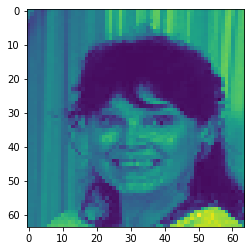

In [15]:
rand = torch.randint(0, 150000, (1,)) 
print(rand)
plt.imshow(data[rand.item()])